# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
# 1. Memuat Dataset
data = pd.read_csv('clustered_data.csv')
print("Dataset Head:")
print(data.head())

print(data.columns)

Dataset Head:
  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128          -0.971275  2023-04-11 16:29:14   
1      TX000002   AC00455           0.269440  2023-06-27 16:44:19   
2      TX000003   AC00019          -0.586882  2023-07-10 18:16:08   
3      TX000004   AC00070          -0.387456  2023-05-05 16:32:11   
4      TX000005   AC00411          -0.973468  2023-10-16 17:51:24   

   TransactionType   Location DeviceID      IP Address MerchantID  Channel  \
0                1  San Diego  D000380  162.198.218.92       M015        0   
1                1    Houston  D000051     13.149.61.4       M052        0   
2                1       Mesa  D000235  215.97.143.157       M009        2   
3                1    Raleigh  D000187  200.13.225.150       M002        2   
4                0    Atlanta  D000308    65.164.3.100       M091        2   

   CustomerAge  CustomerOccupation  TransactionDuration  LoginAttempts  \
0     1.423718              

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [3]:
# 2. Data Splitting
X = data.drop(columns=['Cluster'])
y = data['Cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [4]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=500),
    'Random Forest': RandomForestClassifier()
}

tuned_models = {}

for name, model in models.items():
    param_grid = {}
    if name == 'Logistic Regression':
        param_grid = {'C': [0.01, 0.1, 1, 10], 'solver': ['lbfgs', 'liblinear']}
    elif name == 'Random Forest':
        param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
    
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train[numeric_columns], y_train)
    best_model = grid_search.best_estimator_
    tuned_models[name] = best_model
    
    models = {
        'Logistic Regression': LogisticRegression(max_iter=500),
        'Random Forest': RandomForestClassifier()
    }

    tuned_models = {}

    for name, model in models.items():
        param_grid = {}
        if name == 'Logistic Regression':
            param_grid = {'C': [0.01, 0.1, 1, 10], 'solver': ['lbfgs', 'liblinear']}
        elif name == 'Random Forest':
            param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
        
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
        grid_search.fit(X_train[numeric_columns], y_train)
        best_model = grid_search.best_estimator_
        tuned_models[name] = best_model
        
        y_pred = best_model.predict(X_test[numeric_columns])
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        
        print(f"\n{name} - Best Parameters: {grid_search.best_params_}")
        print(f"{name} Classification Report:")
        print(classification_report(y_test, y_pred))
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print(f"\n{name} - Best Parameters: {grid_search.best_params_}")
    print(f"{name} Classification Report:")
    print(classification_report(y_test, y_pred))


Logistic Regression - Best Parameters: {'C': 10, 'solver': 'lbfgs'}
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       386
           1       0.99      0.99      0.99        98
           2       1.00      1.00      1.00        19

    accuracy                           1.00       503
   macro avg       1.00      1.00      1.00       503
weighted avg       1.00      1.00      1.00       503


Random Forest - Best Parameters: {'max_depth': None, 'n_estimators': 50}
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       386
           1       0.95      0.96      0.95        98
           2       1.00      1.00      1.00        19

    accuracy                           0.98       503
   macro avg       0.98      0.98      0.98       503
weighted avg       0.98      0.98      0.98       503


Random Forest 

- Model yang digunakan adalan **Random Forest Classifier** dengan 100 pohon keputusan.
- Model ini akan belajar dari data latih untuk mengenali pola transaksi berdasarkan cluster yang sudah ditentukan sebelumnya.
- Setelah model dilatih, kita bisa menggunakannya untuk melakukan prediksi pada data uji dan mengevaluasi kinerjanya.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

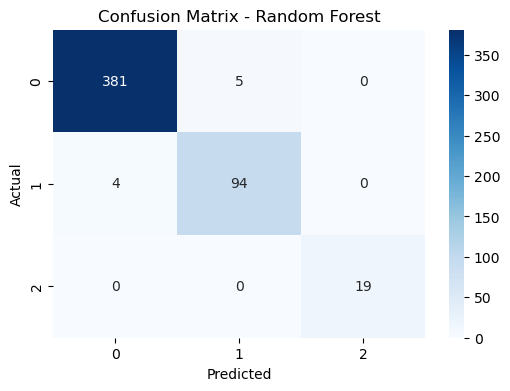

In [6]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [7]:
# 5c. Tuning Model dengan GridSearchCV (Optional)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
rf = RandomForestClassifier()
gs = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
gs.fit(X_train[numeric_columns], y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [8]:
# Evaluasi Model Setelah Tuning
y_pred_best = best_model.predict(X_test[numeric_columns])
accuracy_best = accuracy_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best, average='weighted')

print("Evaluasi Model Setelah Tuning:")
print(f"Accuracy: {accuracy_best:.4f}")
print(f"F1-Score: {f1_best:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_best))

# Perbandingan hasil sebelum dan sesudah tuning
improvement = accuracy_best - acc
print(f"Peningkatan Akurasi setelah tuning: {improvement:.4f}")

Evaluasi Model Setelah Tuning:
Accuracy: 0.9821
F1-Score: 0.9821
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       386
           1       0.95      0.96      0.95        98
           2       1.00      1.00      1.00        19

    accuracy                           0.98       503
   macro avg       0.98      0.98      0.98       503
weighted avg       0.98      0.98      0.98       503

Peningkatan Akurasi setelah tuning: 0.0000


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

In [9]:
# 5b. Evaluasi Model Klasifikasi
eval_results = {}
for name, model in tuned_models.items():
    y_pred = model.predict(X_test[numeric_columns])
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    eval_results[name] = {'Accuracy': acc, 'F1-Score': f1}
    print(f"\nEvaluasi {name}:")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1-Score: {f1:.4f}")


Evaluasi Logistic Regression:
Accuracy: 0.9960
F1-Score: 0.9960

Evaluasi Random Forest:
Accuracy: 0.9821
F1-Score: 0.9821
